In [1]:
import pandas as pd

In [2]:
lcn = pd.read_csv('LungCapData.csv')

In [3]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [4]:
lcn.shape

(725, 6)

### To build predictive model which can predict lung capacity of the person

In [5]:
# Data Gathering
# Data cleaning
# sampling

In [6]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [7]:
lcn.Smoke = lcn.Smoke.replace({'no':0,'yes':1})
lcn.Caesarean = lcn.Caesarean.replace({'no':0,'yes':1})
lcn.Gender = lcn.Gender.replace({'male':1,'female':0})

In [8]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


### Sampling

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
lcn_train,lcn_test = train_test_split(lcn,test_size=.2)

In [11]:
lcn_train.shape

(580, 6)

In [12]:
lcn_test.shape

(145, 6)

In [13]:
lcn_train_x = lcn_train.iloc[ : , 1::]
lcn_train_y = lcn_train.iloc[ : , 0 ]

In [14]:
lcn_test_x = lcn_test.iloc[ : , 1::]
lcn_test_y = lcn_test.iloc[ : , 0 ]

In [15]:
#Label Encodel
#from sklearn.preprocessing import la

In [16]:
lcn_train_x

,Age,Height,Smoke,Gender,Caesarean
621,16,74.2,1,1,1
157,5,55.8,0,0,1
661,10,55.7,0,0,0
586,11,65.6,1,1,1
705,19,73.6,0,0,1
...,...,...,...,...,...
686,16,66.0,0,0,1
319,16,79.3,0,1,1
718,17,68.8,0,1,1
517,9,66.5,0,1,0


In [17]:
lcn_train_y

621    10.625
157     5.550
661     7.325
586     8.925
705    12.425
        ...  
686     6.150
319    10.975
718     7.175
517     9.325
369    11.650
Name: LungCap, Length: 580, dtype: float64

### Build a Model

In [18]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(lcn_train_x,lcn_train_y)

LinearRegression()

In [19]:
Rsquare = linreg.score(lcn_train_x,lcn_train_y)
Rsquare

0.8486036087171169

In [20]:
N = lcn_train_x.shape[0]
K = lcn_train_x.shape[1]

AdjRsquare = 1-(1-Rsquare)*(N-1)/(N-K-1)
AdjRsquare

0.8472848248209246

In [21]:
# create model on property price data set

# Sale_price is the target variable

# Rsqure and AdjRsqure 

In [22]:
#Prediction,error,check the assumptions, mse,rmse

In [23]:
linreg.coef_

array([ 0.15258354,  0.2703263 , -0.65734859,  0.33582447, -0.18448562])

In [24]:
lcn_train_x.columns

Index(['Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [25]:
linreg.intercept_

-11.545046773779667

In [26]:
#y = -11.336065441760805 + 0.16219648*Age,  0.26394307*Height, -0.55799358*Smoke,  0.35992384*Gender, -0.14557744*Caesarean

In [27]:
pred_train = linreg.predict(lcn_train_x) # prediction for each row 

In [28]:
#Error =  diff btwn actual and predicted value

In [29]:
train_err = lcn_train_y - pred_train

In [30]:
train_err  # error for each record in my train data

# Assumptions are checked ony on the train data bcz model is building on train data

621    0.176509
157    1.432407
661    2.287037
586    1.564232
705    1.359430
         ...   
686   -2.403340
319   -1.509504
718   -2.623661
517    1.184272
369    0.297801
Name: LungCap, Length: 580, dtype: float64

### Checking The Assumptions

In [31]:
import numpy as np

In [32]:
np.mean(train_err)
# mean of the error terms should be zero

5.038115518643814e-16

In [33]:
lcn_train_y.mean()

7.969365517241379

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 1.,  0.,  0.,  3.,  2.,  5.,  8.,  9., 14., 15., 36., 29., 34.,
        36., 32., 44., 49., 56., 48., 42., 24., 27., 24., 16.,  9., 10.,
         3.,  0.,  2.,  2.]),
 array([-3.41991171, -3.20779871, -2.99568572, -2.78357272, -2.57145973,
        -2.35934673, -2.14723374, -1.93512075, -1.72300775, -1.51089476,
        -1.29878176, -1.08666877, -0.87455577, -0.66244278, -0.45032979,
        -0.23821679, -0.0261038 ,  0.1860092 ,  0.39812219,  0.61023519,
         0.82234818,  1.03446117,  1.24657417,  1.45868716,  1.67080016,
         1.88291315,  2.09502615,  2.30713914,  2.51925213,  2.73136513,
         2.94347812]),
 <BarContainer object of 30 artists>)

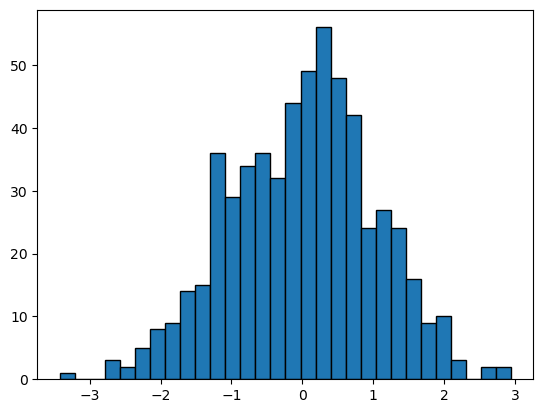

In [35]:
plt.hist(train_err,bins = 30,edgecolor = 'k')

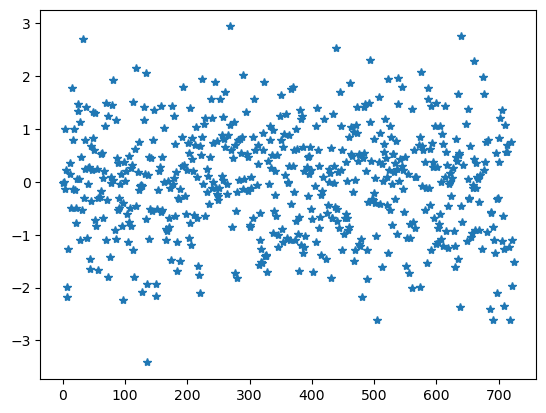

In [36]:
plt.plot(train_err,"*")
#Scatter plot ---> no pattern should be seen

In [37]:
actual_pred = pd.DataFrame()

In [38]:
actual_pred['Actual'] = lcn_train_y
actual_pred['Predicted'] = pred_train

In [39]:
actual_pred

,Actual,Predicted
621,10.625,10.448491
157,5.550,4.117593
661,7.325,5.037963
586,8.925,7.360768
705,12.425,11.065570
...,...,...
686,6.150,8.553340
319,10.975,12.484504
718,7.175,9.798661
517,9.325,8.140728


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

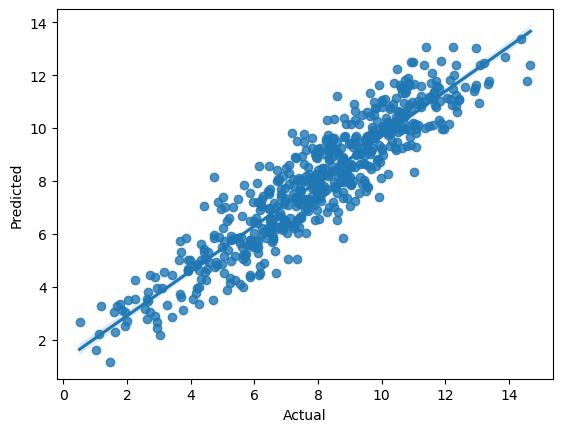

In [40]:
sns.regplot(x='Actual',y='Predicted',data = actual_pred)

In [41]:
actual_pred.shape

(580, 2)

In [42]:
# to check the MAPE, MSE,RMSE on the test data

In [43]:
pred_test = linreg.predict(lcn_test_x)
err_test = lcn_test_y - pred_test

In [44]:
err_test

310   -2.078180
481   -0.228077
570    0.209054
235   -0.851383
173   -0.850139
         ...   
425   -1.371847
272   -1.803314
580   -0.387788
309   -1.440294
1     -0.612483
Name: LungCap, Length: 145, dtype: float64

In [45]:
MSE = np.mean(np.square(err_test))
MSE

1.0319534234446748

In [46]:
RMSE = np.sqrt(MSE)
RMSE

1.0158510833014232

In [47]:
#percentage error = error*100 /actual

In [48]:
MAPE= np.mean(np.abs((err_test*100/lcn_test_y)))

In [49]:
MAPE  # Mean absolute percentage error

14.317890840893511

In [50]:
acc = 100 -MAPE   # Accuracy of model
acc

85.68210915910649